# Comma

When we try to remove comma marks, we are confronted with suboptimal results
when using the normal mark parameters.

A case study in tweaking!

See [clean](https://among.github.io/fusus/fusus/clean.html)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fusus.book import Book

In [3]:
B = Book(cd="~/github/among/fusus/example")

In [4]:
# cd to the book directory
!cd `pwd`

## Marks

Let's have a closer look at the marks that are defined in this directory.

Marks and their settings
	band [high]
		  1: «a»                  acc=0.8, bw=4, r=0.1


		  2: «footnote1»          acc=0.8, bw=4, r=0.1


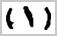

		  3: «footnote2»          acc=0.8, bw=4, r=0.1


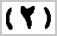

		  4: «footnote3»          acc=0.8, bw=4, r=0.1


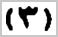

		  5: «footnote4»          acc=0.8, bw=4, r=0.1


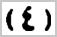

		  6: «footnote5»          acc=0.8, bw=4, r=0.1


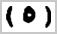

		  7: «footnote6»          acc=0.8, bw=4, r=0.1


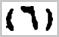

		  8: «footnote7»          acc=0.8, bw=4, r=0.1


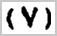

		  9: «footnote8»          acc=0.8, bw=4, r=0.1


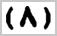

		 11: «shadda.a»           acc=0.8, bw=4, r=0.1


		 10: «shadda.a.2»         acc=0.8, bw=4, r=0.1


		 12: «u»                  acc=0.8, bw=4, r=0.1


		 13: «un»                 acc=0.8, bw=4, r=0.1


	band [low]
		 14: «a»                  acc=0.8, bw=4, r=0.1


		 15: «dash»               acc=0.8, bw=4, r=0.1


	band [mid]
		 16: «bracketClose»       acc=0.8, bw=4, r=0.1


		 17: «bracketOpen»        acc=0.8, bw=4, r=0.1


		 18: «colon»              acc=0.8, bw=4, r=0.1


		 19: «comma»              acc=0.8, bw=4, r=0.1


		 20: «comma2»             acc=0.8, bw=4, r=0.1


		 21: «guillemetClose»     acc=0.8, bw=4, r=0.1


		 22: «guillemetOpen»      acc=0.8, bw=4, r=0.1


		 23: «question»           acc=0.8, bw=4, r=0.1


		 24: «semicolon»          acc=0.8, bw=4, r=0.1


In [5]:
B.availableMarks()

We are interested in number 19: the *comma* in the *mid* band.

Later we will address number 20 as well: `comma2`.

(The mid band is the set of strokes in which most of the ink of the lines fall).

You see that it already has a different set of parameters: 
`acc=0.7, bw=6, r=0.05`.

It got these settings from the file name that stores an example of the comma, which is used as a template
to find them:

In [6]:
!ls marks/mid

bracketClose.png   comma.png          guillemetOpen.png
bracketOpen.png    comma2.png         question.png
colon.png          guillemetClose.png semicolon.png


Below we show how to arrived at good values. First a short explanation:

`acc` *accuracy*: when we search for comma occurrences, we find match candidates together with the accuracy of the match. If the accuracy of a match is below this threshold, we reject the candidate.

`bw` *connect-border-width*: when we have a promising match candidate, we inspect the inside border of the
and the outside border of the match, and give penalties for ink connections between the inside and the outside. This parameter states the width of the inside and outside border that we inspect.
The idea is that if the match is connected to its environment by too much ink, the match is not an instance
of the mark in question, but a part of another letter. Such marks will be rejected.

`r` *connect-ratio*: when we are inspecting the inner and outer borders of a match and have computed
how much ink crosses the border, we express the amount in a ratio: the amount of pixels involved
in ink crossings divided by the total amount of pixels in the border. (In reality it is a bit subtler, though).

## Page preparation

We are going to experiment with these values on a certain example.

Here is the example:

In [7]:
page = B.process(pages=131, batch=False, boxed=True, doOcr=False, uptoLayout=True)

  0.00s Batch of 1 pages: 131
  0.00s Start batch processing images
   |      |      |    -0.00s     1 131.jpg                                 
  2.43s all done


We have performed all processing steps before the actual cleaning.

Here is the detected layout:

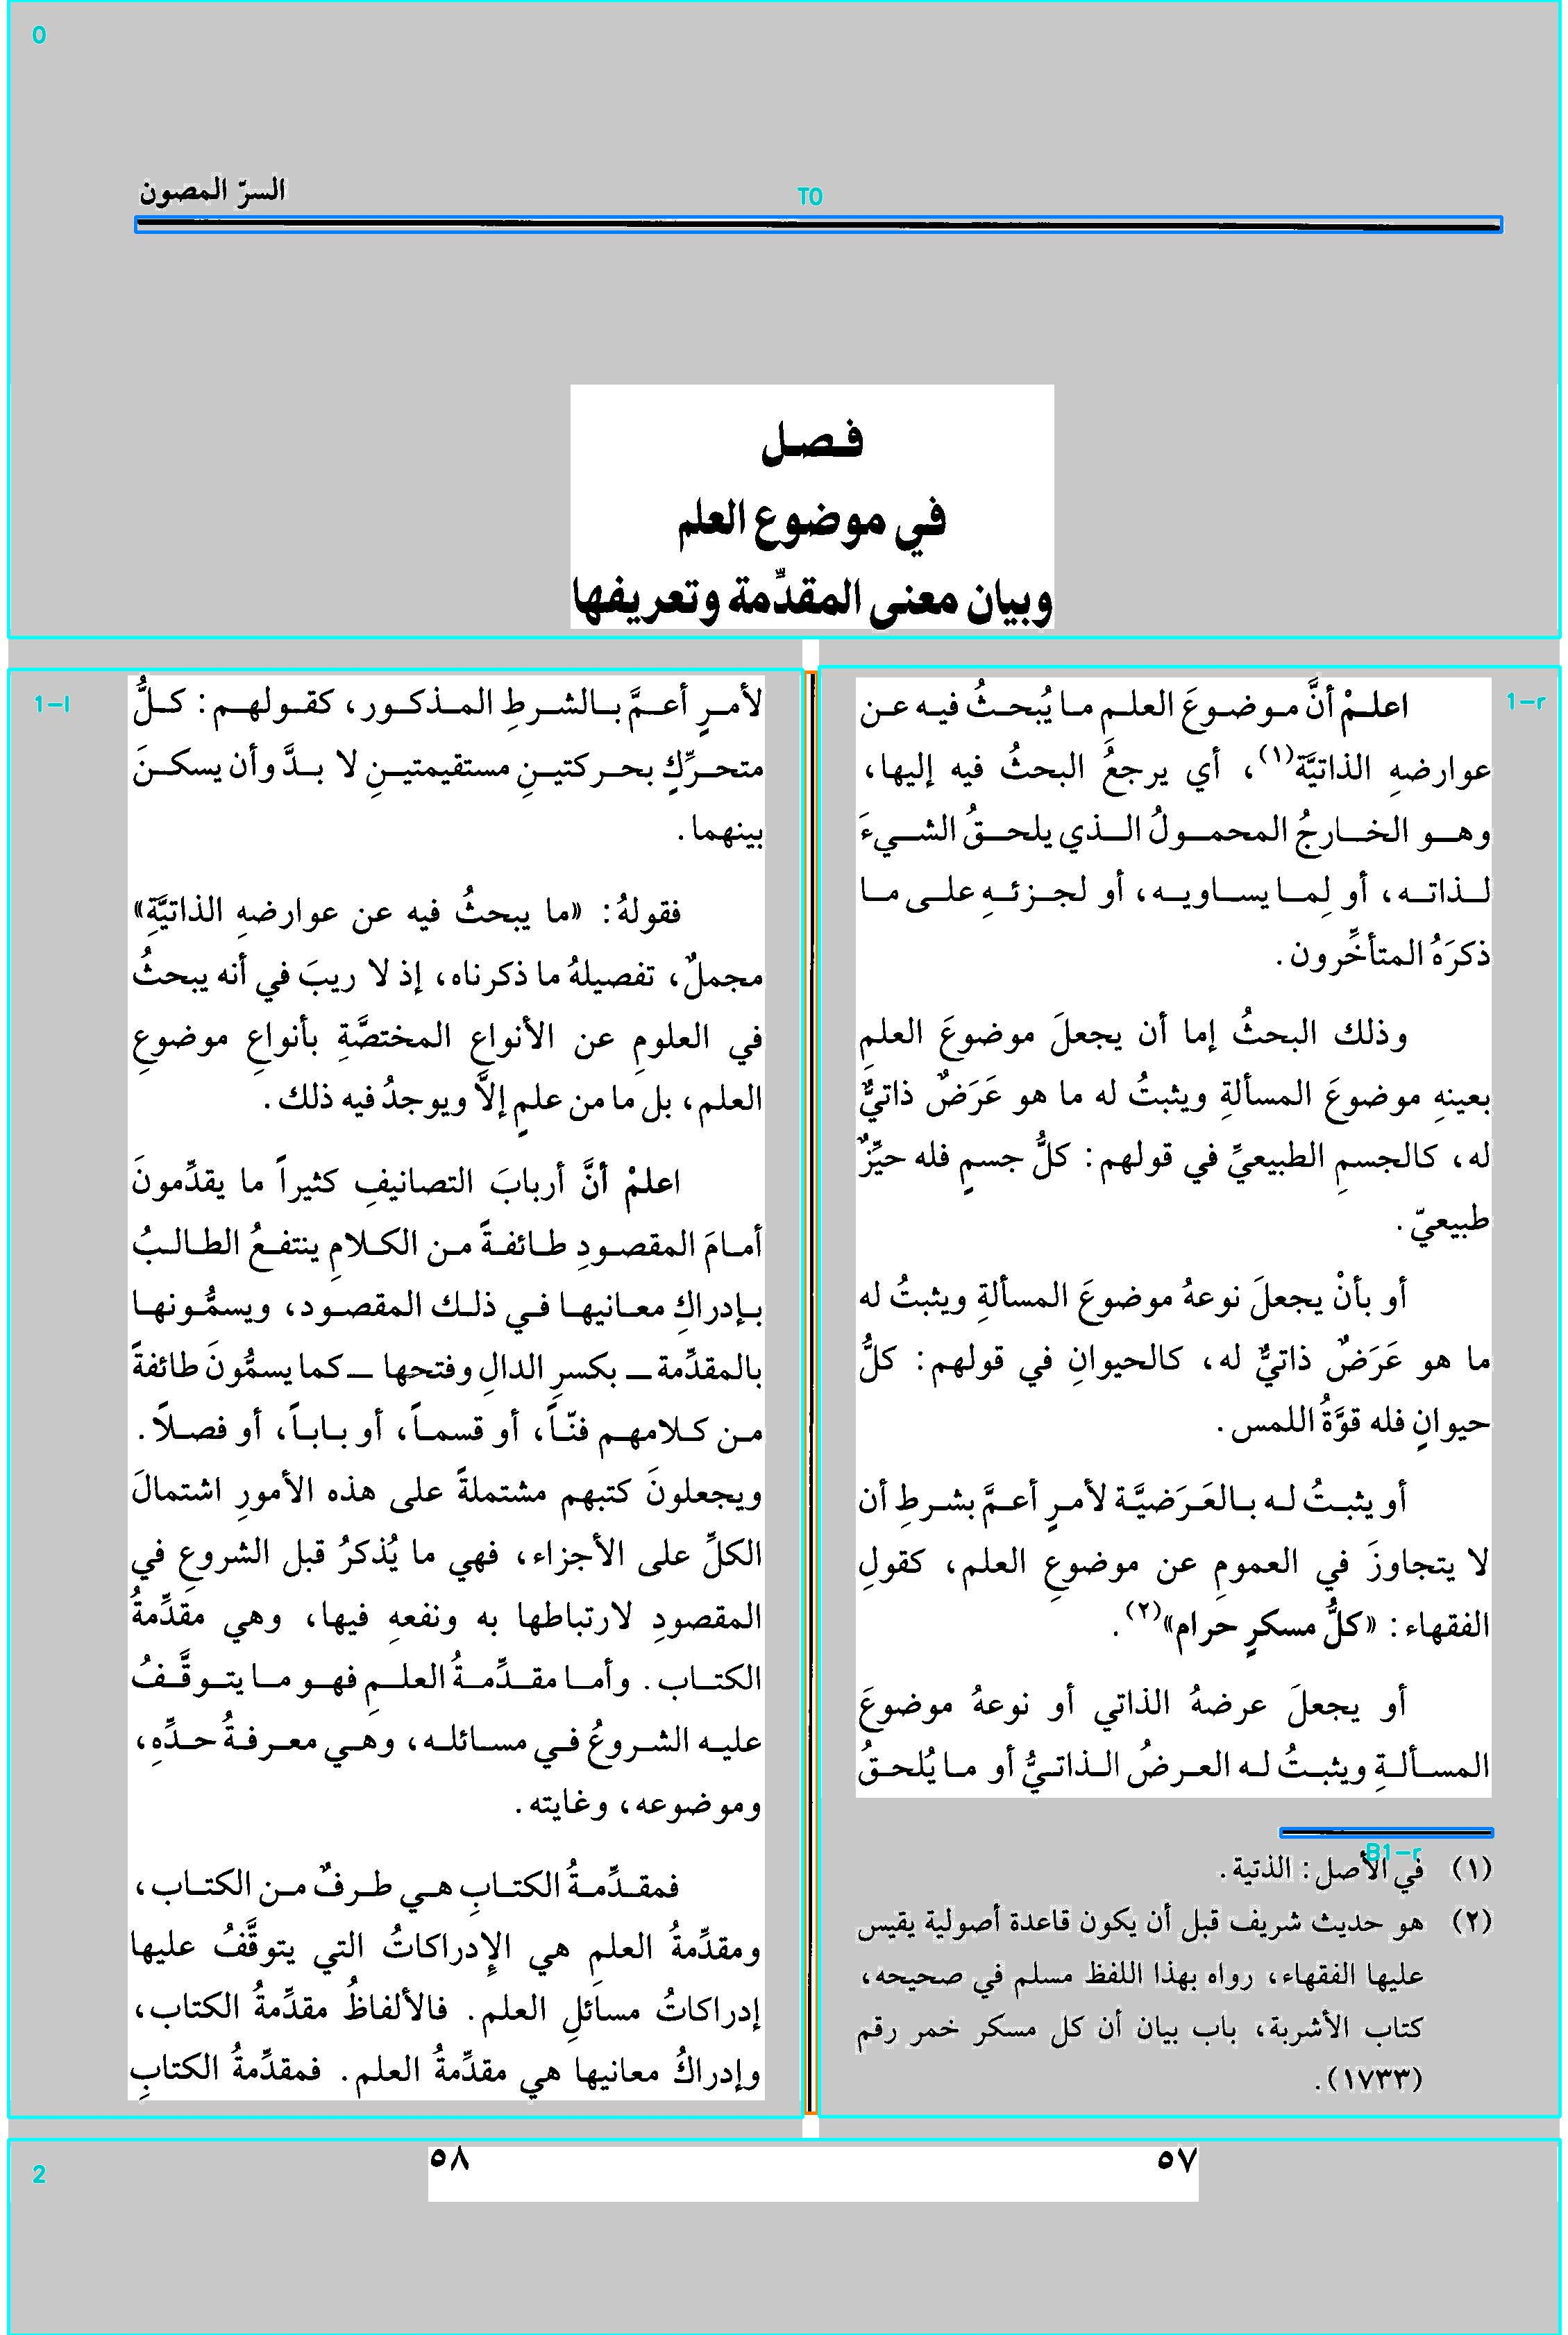

In [8]:
page.show(stage="layout")

Observe block `1-l` line 18. It has one comma.

## Cleaning

Lets see whether we can detect the comma in line 18.

Short explanation of the parameters passed to `_clean()` below:

`mark`: a list of marks, specified by their band and name, with overriding match parameters provided.

`block`: the stripe number and column specification of the block we restrict ourselves to

`line`: the line number of the line we focus on

`showKept`: if matches are discarded because of their ink-connectedness to their environment,
show them in a green box and record the match data.

block 1l line 18 BEFORE/AFTER cleaning



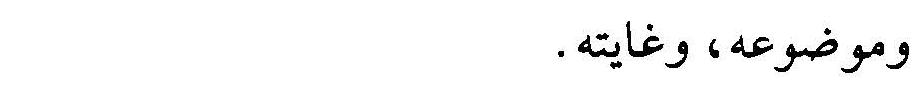

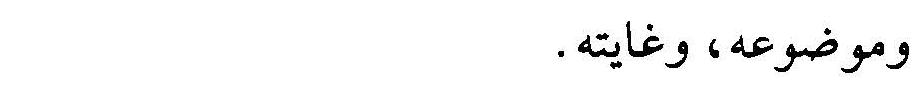

   |     9.34s cleaning done


In [9]:
block = (1, "l")
mark = [("mid", "comma", dict(acc=0.8, bw=4, r=0.1))]

page.cleaning(mark=mark, block=block, line=18, showKept=True)

Apparently not.

### Tweak the accuracy

Let's decrease the accuracy:

   |   block 1l line 18 BEFORE/AFTER cleaning
   |   


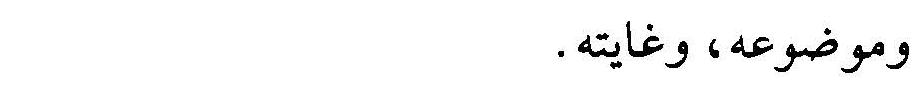

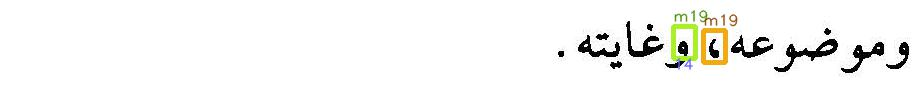

mid


   |   19: comma                wiped    1 x, kept    1 x
   |                            kept     1 x
   |      |   wiped [ 1l] tblr= 889 2585  911 2617, value= 0.73 conn=0.000 border= 4
   |      |   kept  [ 1l] tblr= 859 2581  881 2613, value= 0.65 conn=0.136 border= 4
   |       24s cleaning done


In [10]:
mark = [("mid", "comma", dict(acc=0.6, bw=4, r=0.1))]

page.cleaning(mark=mark, block=block, line=18, showKept=True)

We have now detected the comma and we are able to reject the false match (green box) because of connectedness.

Suppose we relax the accuracy even further:

   |   block 1l line 18 BEFORE/AFTER cleaning
   |   


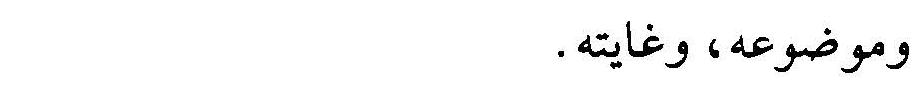

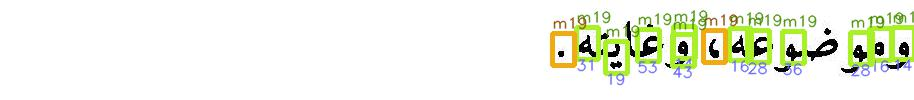

mid


   |   19: comma                wiped    2 x, kept   11 x
   |                            kept    11 x
   |      |   wiped [ 1l] tblr= 738 2588  760 2620, value= 0.43 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 889 2585  911 2617, value= 0.73 conn=0.000 border= 4
   |      |   kept  [ 1l] tblr= 858 2589  880 2621, value= 0.44 conn=0.426 border= 4
   |      |   kept  [ 1l] tblr=1078 2582 1100 2614, value= 0.45 conn=0.136 border= 4
   |      |   kept  [ 1l] tblr= 915 2583  937 2615, value= 0.47 conn=0.156 border= 4
   |      |   kept  [ 1l] tblr= 791 2596  813 2628, value= 0.48 conn=0.188 border= 4
   |      |   kept  [ 1l] tblr= 762 2582  784 2614, value= 0.49 conn=0.312 border= 4
   |      |   kept  [ 1l] tblr=1036 2587 1058 2619, value= 0.55 conn=0.276 border= 4
   |      |   kept  [ 1l] tblr= 933 2585  955 2617, value= 0.55 conn=0.281 border= 4
   |      |   kept  [ 1l] tblr= 823 2584  845 2616, value= 0.56 conn=0.526 border= 4
   |      |   kept  [ 1l] tblr= 968 2586  990 2

In [11]:
mark = [("mid", "comma", dict(acc=0.4, bw=4, r=0.1))]

page.cleaning(mark=mark, block=block, line=18, showKept=True)

Now we have many more matches, most of them discarsable.

The orange boxes are matches that will be wiped from the image later on.
The green boxes are matches that are not good enough because of ink connections with the environment.

Now focus on the orange boxes:
we find the comma, but we also find the dot and we cannot get rid of that.

That is bad! With such a low accuracy, we will get many spurious matches.

## A better mark template

But why did not we find the comma in the first place, with standard accuracy?

The shape seems to far off.
The best solution is to create another template, `comma2`, for this mark.

On a Mac, you can do that in Preview
by selecting this occurrence in the image file, and saving it in a new
`comma2.png` file in the `marks` directory.

In [12]:
B.availableMarks(band='mid', mark='comma2')

   |   Marks and their settings
   |   	band [mid]
   |   		 20: «comma2»             acc=0.8, bw=4, r=0.1


   |   block 1l line 18 BEFORE/AFTER cleaning
   |   


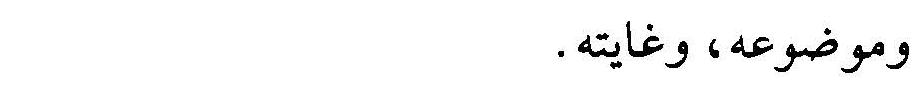

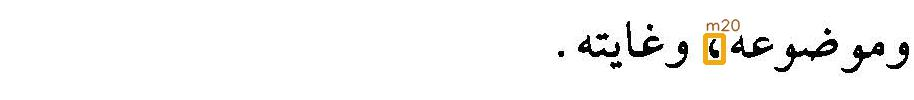

mid


   |   20: comma2               wiped    1 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr= 891 2590  909 2617, value= 1.00 conn=0.000 border= 4
   |       44s cleaning done


In [13]:
mark = [("mid", "comma2", dict(acc=0.8, bw=4, r=0.1))]

page.cleaning(mark=mark, block=block, line=18, showKept=True)

Very clean match, of course. From now on, we use both comma's, because we want to grow one set of marks
that work for various books.

### Decrease accuracy (again)

For that reason, we do decrease the accuracy a bit, to 0.7

   |   block 1l line 18 BEFORE/AFTER cleaning
   |   


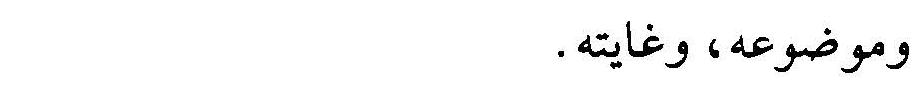

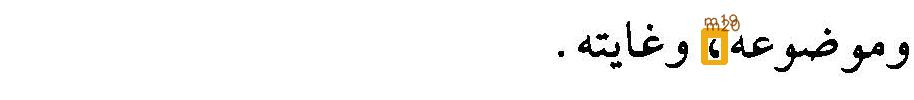

mid


   |   19: comma                wiped    1 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr= 889 2585  911 2617, value= 0.73 conn=0.000 border= 4


   |   20: comma2               wiped    1 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr= 891 2590  909 2617, value= 1.00 conn=0.000 border= 4
   |    3m 52s cleaning done


In [18]:
mark = [
    ("mid", "comma", dict(acc=0.7, bw=4, r=0.1)),
    ("mid", "comma2", dict(acc=0.7, bw=4, r=0.1)),
]

page.cleaning(mark=mark, block=block, line=18, showKept=True)

Observe block `1-l` (the left column), line 5.

   |   block 1l line 5 BEFORE/AFTER cleaning
   |   


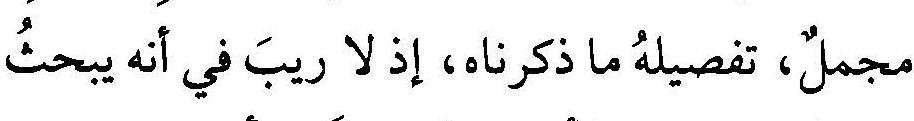

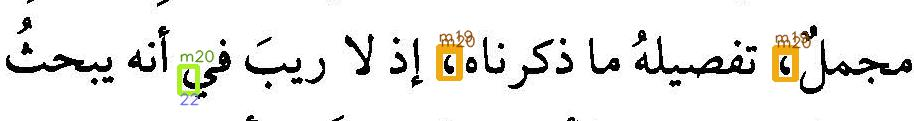

mid


   |   19: comma                wiped    2 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr= 624 1392  646 1424, value= 0.74 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 960 1393  982 1425, value= 0.75 conn=0.000 border= 4


   |   20: comma2               wiped    2 x, kept    1 x
   |                            kept     1 x
   |      |   wiped [ 1l] tblr= 626 1397  644 1424, value= 0.96 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 962 1398  980 1425, value= 0.96 conn=0.000 border= 4
   |      |   kept  [ 1l] tblr= 365 1412  383 1439, value= 0.76 conn=0.222 border= 4
   |    3m 56s cleaning done


In [19]:
page.cleaning(mark=mark, block=block, line=5, showKept=True)

It has two commas.
They get detected.

Observe that `comma2` (=`m20`) also has a hit inside a letter, but that match is green.

Very satisfying.

Can we lower the accuracy further?

   |   block 1l line 5 BEFORE/AFTER cleaning
   |   


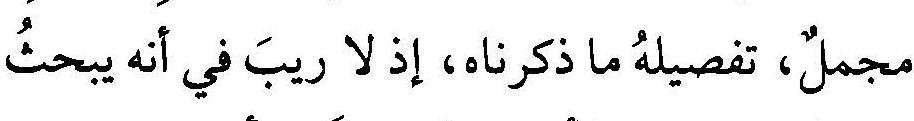

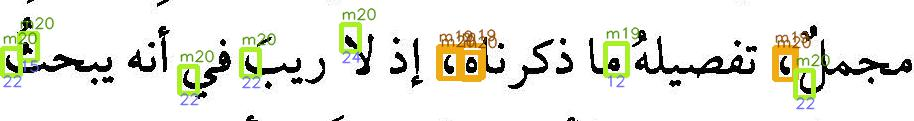

mid


   |   19: comma                wiped    3 x, kept    1 x
   |                            kept     1 x
   |      |   wiped [ 1l] tblr= 647 1391  669 1423, value= 0.68 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 624 1392  646 1424, value= 0.74 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 960 1393  982 1425, value= 0.75 conn=0.000 border= 4
   |      |   kept  [ 1l] tblr= 791 1389  813 1421, value= 0.61 conn=0.125 border= 4


   |   20: comma2               wiped    3 x, kept    6 x
   |                            kept     6 x
   |      |   wiped [ 1l] tblr= 648 1398  666 1425, value= 0.66 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 626 1397  644 1424, value= 0.96 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 962 1398  980 1425, value= 0.96 conn=0.000 border= 4
   |      |   kept  [ 1l] tblr= 527 1370  545 1397, value= 0.61 conn=0.241 border= 4
   |      |   kept  [ 1l] tblr= 205 1379  223 1406, value= 0.63 conn=0.148 border= 4
   |      |   kept  [ 1l] tblr= 981 1416  999 1443, value= 0.63 conn=0.222 border= 4
   |      |   kept  [ 1l] tblr= 188 1394  206 1421, value= 0.67 conn=0.222 border= 4
   |      |   kept  [ 1l] tblr= 427 1395  445 1422, value= 0.68 conn=0.222 border= 4
   |      |   kept  [ 1l] tblr= 365 1412  383 1439, value= 0.76 conn=0.222 border= 4
   |    6m 16s cleaning done


In [22]:
mark = [
    ("mid", "comma", dict(acc=0.6, bw=4, r=0.1)),
    ("mid", "comma2", dict(acc=0.6, bw=4, r=0.1)),
]

page.cleaning(mark=mark, block=block, line=5, showKept=True)

Now both `comma` (=`m19`) and `comma2` (=`m20`) produce a bad match, at an accuracy of 0.68 and 0.66 respectively.

With an accuracy of 0.7 we have a good separation between good and bad matches for both commas.

The separation for comma2 is much better, though.

### Back to normal accuracy

Better keep it a bit safer, back to 0.8:

   |   block 1l line 5 BEFORE/AFTER cleaning
   |   


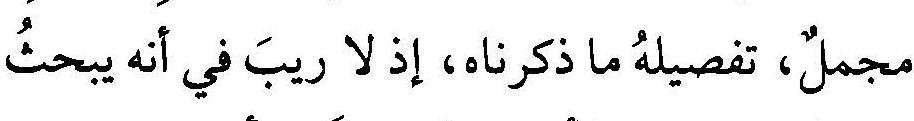

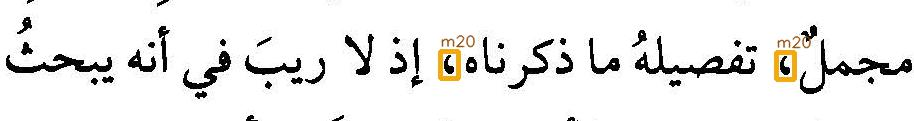

mid


   |   20: comma2               wiped    2 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr= 626 1397  644 1424, value= 0.96 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 962 1398  980 1425, value= 0.96 conn=0.000 border= 4
   |   11m 28s cleaning done


In [24]:
mark = [
    ("mid", "comma", dict(acc=0.8, bw=4, r=0.1)),
    ("mid", "comma2", dict(acc=0.8, bw=4, r=0.1)),
]

page.cleaning(mark=mark, block=block, line=5, showKept=True)

As you see, we now totally rely on `comma2`.

So far so good. Let's check the whole page (without the green boxes):

   |      |   20 - mid       : comma2               wiped   22 x, kept    0 x
   |   11m 52s cleaning done


mid


   |   20: comma2               wiped   22 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1r] tblr=2091 1659 2109 1686, value= 0.92 conn=0.000 border= 4
   |      |   wiped [ 1r] tblr=1989 1277 2007 1304, value= 0.92 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 396 2051  414 2078, value= 0.92 conn=0.000 border= 4
   |      |   wiped [ 1r] tblr=1731 1950 1749 1977, value= 0.92 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 767 2053  785 2080, value= 0.96 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 982 1576 1000 1603, value= 0.96 conn=0.000 border= 4
   |      |   wiped [ 1r] tblr=1790 1099 1808 1126, value= 0.96 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 409 1873  427 1900, value= 0.96 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 194 2497  212 2524, value= 0.96 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 439 2321  457 2348, value= 0.96 conn=0.000 border= 4
   |      |   wiped [ 1r] tblr=1361 2244 1379 2

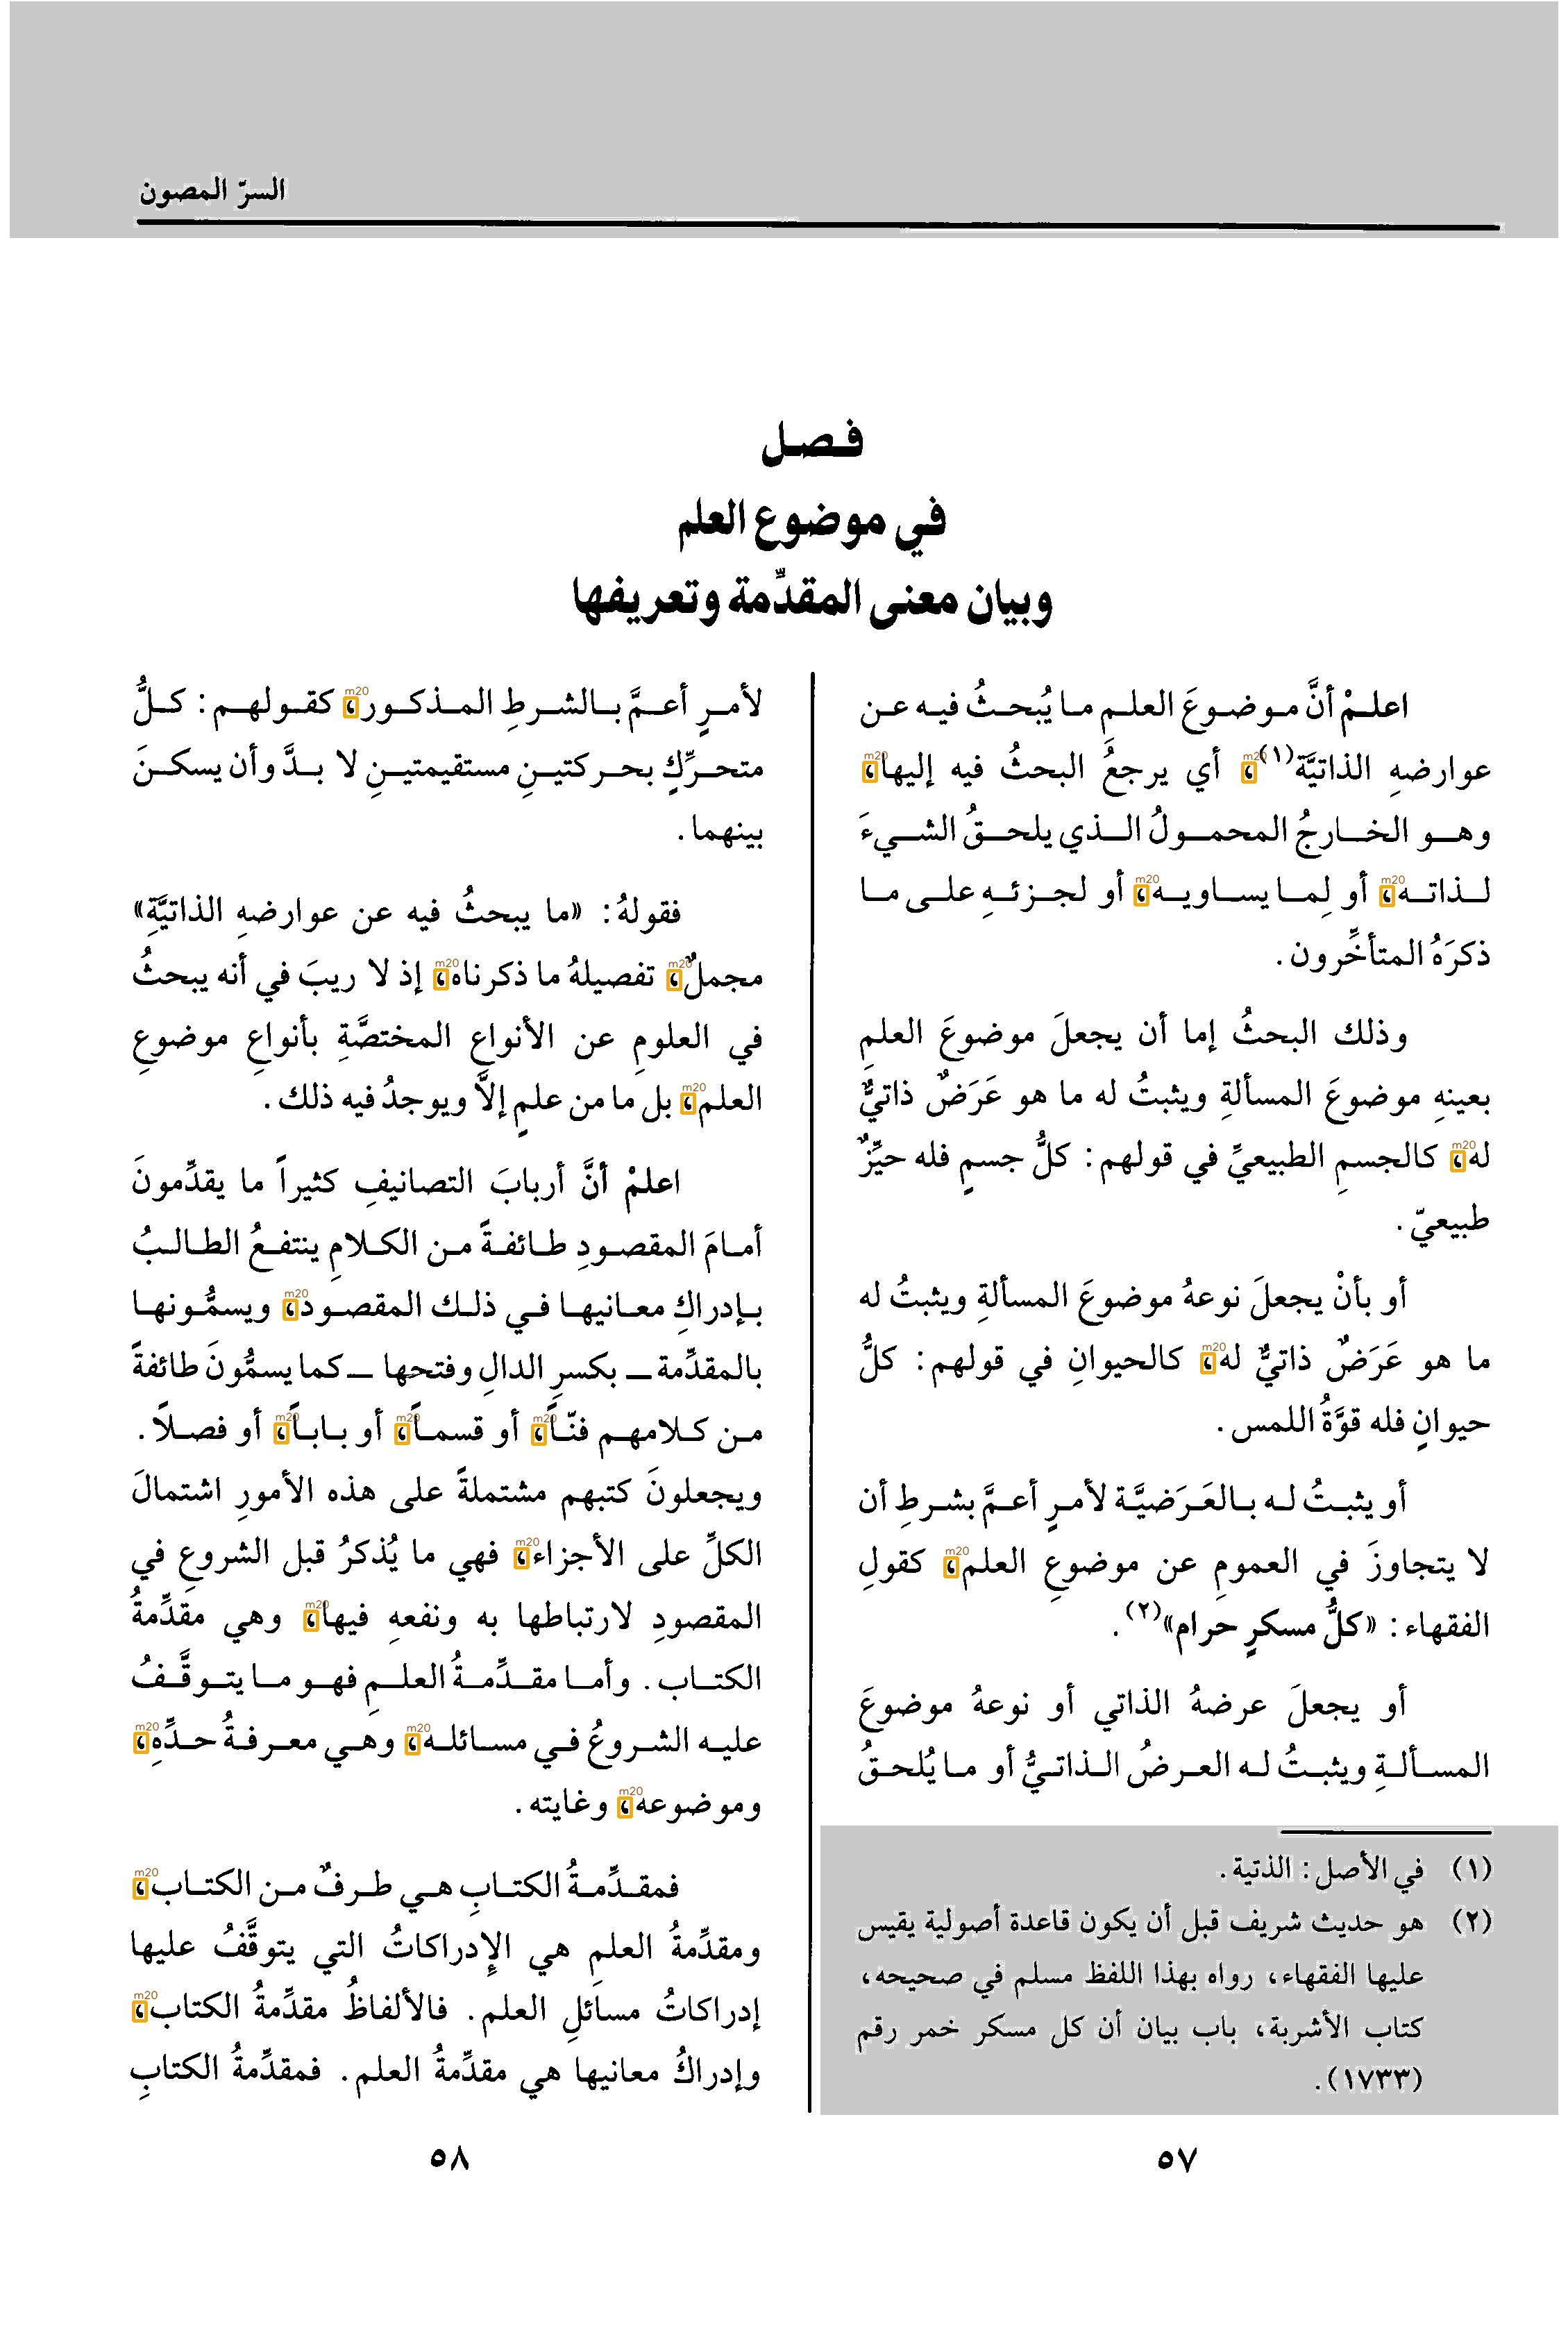

In [25]:
page.cleaning(mark=mark, block=None, line=None, showKept=False)
page.show(stage="boxed,markData")

Inspection shows that all orange boxes mark true commas, and that none are missed.

### Playing with ink connectedness

There is also another way to reign in matches.

Suppose we have reason to match with `comma` at a low accuracy of `0.6`.
Then we find this:

   |      |   block 1l line 11 BEFORE/AFTER cleaning
   |      |   


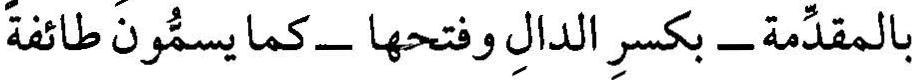

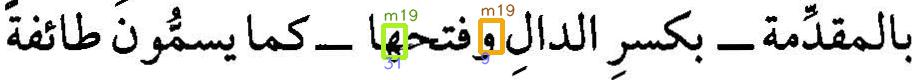

mid


   |   19: comma                wiped    1 x, kept    1 x
   |                            kept     1 x
   |      |   wiped [ 1l] tblr=1958 1990  666  688, value= 0.67 conn=0.091 border= 4
   |      |   kept  [ 1l] tblr=1963 1995  569  591, value= 0.61 conn=0.312 border= 4
   |       13s cleaning done


In [18]:
mark = [
    ("mid", "comma", dict(acc=0.6, bw=4, r=0.1)),
]

page._clean(mark=mark, block=block, line=11, showKept=True)
# page.show(stage="boxed,markData")

The orange box is the bad news. It is found with an accuracy of 0.67, and we did not want to raise our accuracy. 

But we see ink between the match and the surroundings. Not much, the connectedness is 0.091, just below our `r=0.1`.

We can be more strict on that:

   |   block 1l line 11 BEFORE/AFTER cleaning
   |   


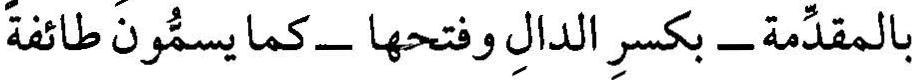

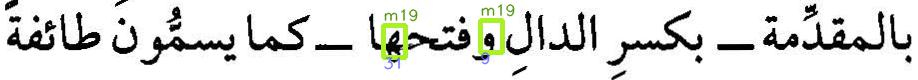

mid


   |   19: comma                wiped    0 x, kept    2 x
   |                            kept     2 x
   |      |   kept  [ 1l] tblr=1963 1995  569  591, value= 0.61 conn=0.312 border= 4
   |      |   kept  [ 1l] tblr=1958 1990  666  688, value= 0.67 conn=0.091 border= 4
   |       14s cleaning done


In [19]:
mark = [
    ("mid", "comma", dict(acc=0.6, bw=4, r=0.05)),
]

page._clean(mark=mark, block=block, line=11, showKept=True)

Lo and behold, the orange box has turned to green, this comma will not be wiped out.

## Lesson
 
The upshot is:

Apply search templates with enough accuracy (>= 0.8).
If you miss matches, it is dangerous to lower the accuracy, because you can get a lot of spurious
matches. Most of these will be discarded on the basis of ink connections, but not all.

It is better to add other mark templates that fit the missed occurrences better.